In [1]:
# Cell 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [2]:
# Cell 2: Load Kaggle Dataset
data_path = '../data/raw/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset Kaggle.csv'

df_kaggle = pd.read_csv(data_path)

print("="*70)
print(" " * 20 + "KAGGLE DATASET LOADED SUCCESSFULLY")
print("="*70)
print(f"Total Records: {len(df_kaggle):,}")
print(f"Total Columns: {len(df_kaggle.columns)}")
print(f"\nColumn Names:")
print(df_kaggle.columns.tolist())

                    KAGGLE DATASET LOADED SUCCESSFULLY
Total Records: 5,000
Total Columns: 12

Column Names:
['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake', 'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk']


In [3]:
# Cell 3: Dataset Overview
print("="*70)
print(" " * 25 + "DATASET OVERVIEW")
print("="*70)

print("\nFirst 10 Rows:")
print(df_kaggle.head(10))

print("\n" + "="*70)
print("Last 5 Rows:")
print(df_kaggle.tail())

print("\n" + "="*70)
print("Random Sample (5 rows):")
print(df_kaggle.sample(5))

                         DATASET OVERVIEW

First 10 Rows:
   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   
5   25      96     160   medium    3.8       medium      no      no     yes   
6   78      64     168   medium    9.9         high      no      no     yes   
7   38      76     194      low    6.6       medium     yes      no     yes   
8   56      58     158   medium    9.6       medium      no      no     yes   
9   75      94     147     none    8.1       medium     yes      no      no   

      profession   bmi health_risk  
0  office_worker  17.6        high 

In [4]:
# Cell 4: Data Types and Structure
print("="*70)
print(" " * 25 + "DATA TYPES & INFO")
print("="*70)

print("\nDataFrame Info:")
print(df_kaggle.info())

print("\n" + "="*70)
print("Data Types Summary:")
print(df_kaggle.dtypes)

print("\n" + "="*70)
print("Dataset Shape:")
print(f"  Rows: {df_kaggle.shape[0]:,}")
print(f"  Columns: {df_kaggle.shape[1]}")

print("\n" + "="*70)
print("Memory Usage:")
print(f"  {df_kaggle.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

                         DATA TYPES & INFO

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB
None

Data Types Summary:
age               int64
weight            int64
height            int64
exercise         object
sleep           float64
sugar_intake     obje

In [5]:
# Cell 5: Missing Values Analysis
print("="*70)
print(" " * 25 + "MISSING VALUES ANALYSIS")
print("="*70)

missing_values = df_kaggle.isnull().sum()
missing_percentage = (missing_values / len(df_kaggle)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nMissing Values Found:")
    print(missing_df.to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(12, 6))
    plt.barh(missing_df['Column'], missing_df['Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../reports/kaggle_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n✅ No missing values found!")
    print("   Dataset is complete and ready for analysis.")

                         MISSING VALUES ANALYSIS

✅ No missing values found!
   Dataset is complete and ready for analysis.


In [6]:
# Cell 6: Statistical Summary
print("="*70)
print(" " * 25 + "STATISTICAL SUMMARY")
print("="*70)

print("\nNumerical Features Summary:")
print(df_kaggle.describe())

print("\n" + "="*70)
print("Categorical Features Summary:")
categorical_cols = df_kaggle.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print(df_kaggle[categorical_cols].describe())
else:
    print("No categorical columns found.")

                         STATISTICAL SUMMARY

Numerical Features Summary:
               age       weight       height        sleep         bmi
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.00000
mean     48.805600    77.359200   171.933200     6.997060    26.84388
std      17.906991    18.714567    15.822225     1.432849     8.25249
min      18.000000    45.000000   145.000000     3.000000    11.40000
25%      34.000000    61.000000   158.000000     6.000000    20.30000
50%      49.000000    77.000000   171.500000     7.000000    26.00000
75%      64.000000    94.000000   186.000000     8.000000    32.40000
max      79.000000   109.000000   199.000000    10.000000    51.40000

Categorical Features Summary:
       exercise sugar_intake smoking alcohol married profession health_risk
count      5000         5000    5000    5000    5000       5000        5000
unique        4            3       2       2       2          8           2
top      medium       medium      no 

                    TARGET VARIABLE: health_risk

Risk Level Distribution:
Risk_Level  Count  Percentage
      high   3490        69.8
       low   1510        30.2


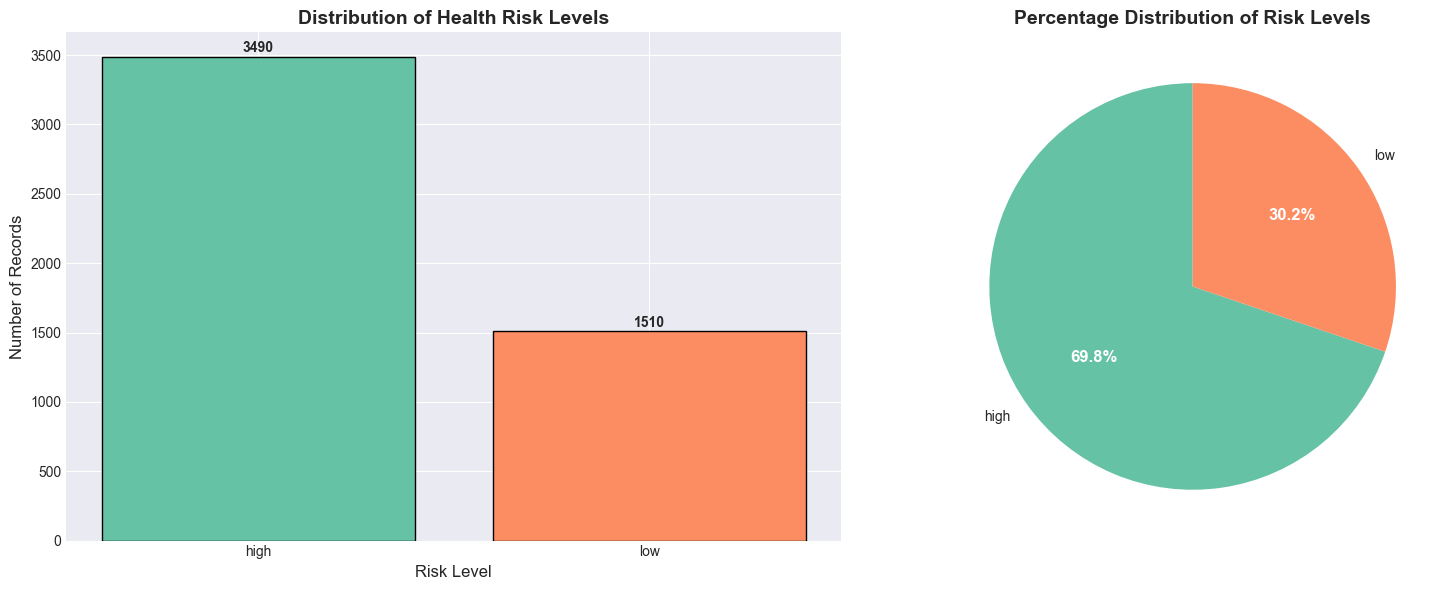


📊 Class Balance Analysis:
   Smallest class: 1,510 samples
   Largest class: 3,490 samples
   Balance ratio: 0.433
   ⚠️  Warning: Class imbalance detected!
   → Consider using stratified sampling or SMOTE


In [7]:
# Cell 7: Target Variable Distribution
print("="*70)
print(" " * 20 + "TARGET VARIABLE: health_risk")
print("="*70)

# Identify target column (adjust name if different)
target_col = 'health_risk'  # Change if your target column has a different name

if target_col in df_kaggle.columns:
    
    # Value counts
    risk_counts = df_kaggle[target_col].value_counts()
    risk_percentage = (risk_counts / len(df_kaggle)) * 100
    
    risk_df = pd.DataFrame({
        'Risk_Level': risk_counts.index,
        'Count': risk_counts.values,
        'Percentage': risk_percentage.values
    })
    
    print("\nRisk Level Distribution:")
    print(risk_df.to_string(index=False))
    
    # Visualizations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bar chart
    axes[0].bar(risk_counts.index, risk_counts.values, 
                color=sns.color_palette("Set2", len(risk_counts)), edgecolor='black')
    axes[0].set_xlabel('Risk Level', fontsize=12)
    axes[0].set_ylabel('Number of Records', fontsize=12)
    axes[0].set_title('Distribution of Health Risk Levels', fontsize=14, fontweight='bold')
    for i, v in enumerate(risk_counts.values):
        axes[0].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    colors = sns.color_palette("Set2", len(risk_counts))
    wedges, texts, autotexts = axes[1].pie(risk_counts.values, labels=risk_counts.index,
                                             autopct='%1.1f%%', startangle=90, colors=colors)
    axes[1].set_title('Percentage Distribution of Risk Levels', fontsize=14, fontweight='bold')
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(12)
    
    plt.tight_layout()
    plt.savefig('../reports/kaggle_risk_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Check class balance
    min_class = risk_counts.min()
    max_class = risk_counts.max()
    balance_ratio = min_class / max_class
    
    print(f"\n📊 Class Balance Analysis:")
    print(f"   Smallest class: {min_class:,} samples")
    print(f"   Largest class: {max_class:,} samples")
    print(f"   Balance ratio: {balance_ratio:.3f}")
    
    if balance_ratio < 0.5:
        print("   ⚠️  Warning: Class imbalance detected!")
        print("   → Consider using stratified sampling or SMOTE")
    else:
        print("   ✅ Classes are reasonably balanced")
        
else:
    print(f"⚠️  Column '{target_col}' not found!")
    print(f"   Available columns: {df_kaggle.columns.tolist()}")

                         NUMERICAL FEATURES ANALYSIS

Numerical Features (5):
  - age
  - weight
  - height
  - sleep
  - bmi


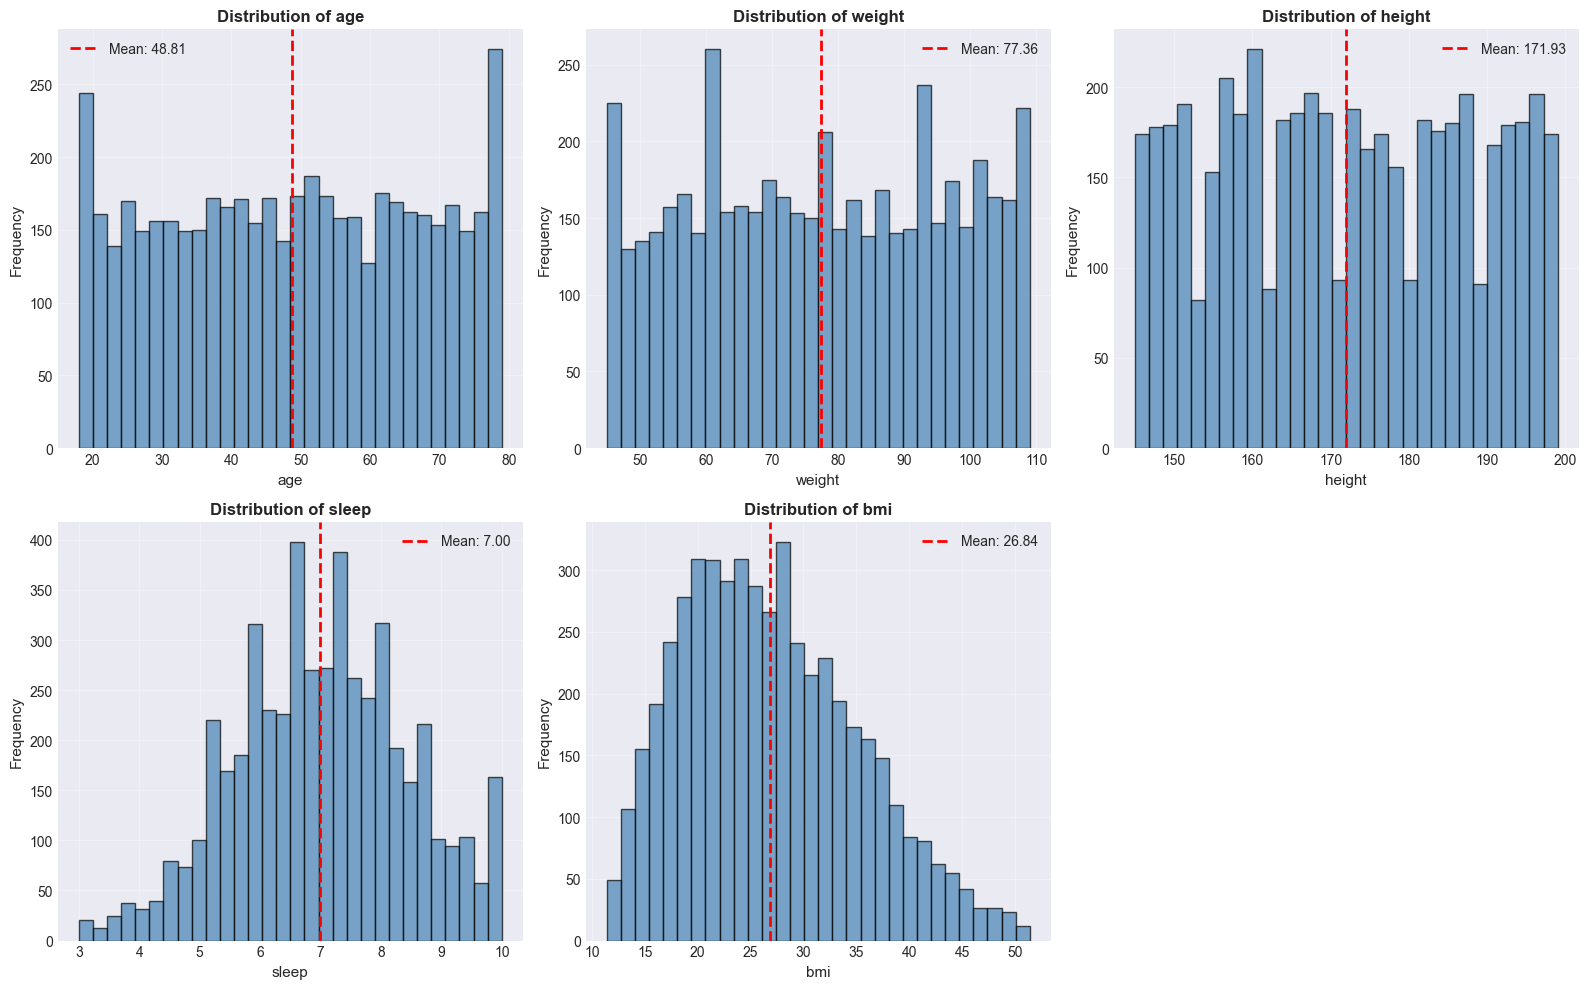


✅ Saved visualization: kaggle_numerical_distributions.png


In [8]:
# Cell 8: Numerical Features Analysis
print("="*70)
print(" " * 25 + "NUMERICAL FEATURES ANALYSIS")
print("="*70)

numerical_cols = df_kaggle.select_dtypes(include=[np.number]).columns.tolist()

# Remove target if it's numerical
if target_col in numerical_cols and df_kaggle[target_col].nunique() <= 10:
    numerical_cols.remove(target_col)

print(f"\nNumerical Features ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

# Distribution plots
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(df_kaggle[col].dropna(), bins=30, color='steelblue', 
                       edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(col, fontsize=11)
        axes[idx].set_ylabel('Frequency', fontsize=11)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = df_kaggle[col].mean()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                          label=f'Mean: {mean_val:.2f}')
        axes[idx].legend()
    
    # Hide unused subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../reports/kaggle_numerical_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Saved visualization: kaggle_numerical_distributions.png")
else:
    print("\nNo numerical features to visualize.")

                    BOX PLOTS - OUTLIER DETECTION


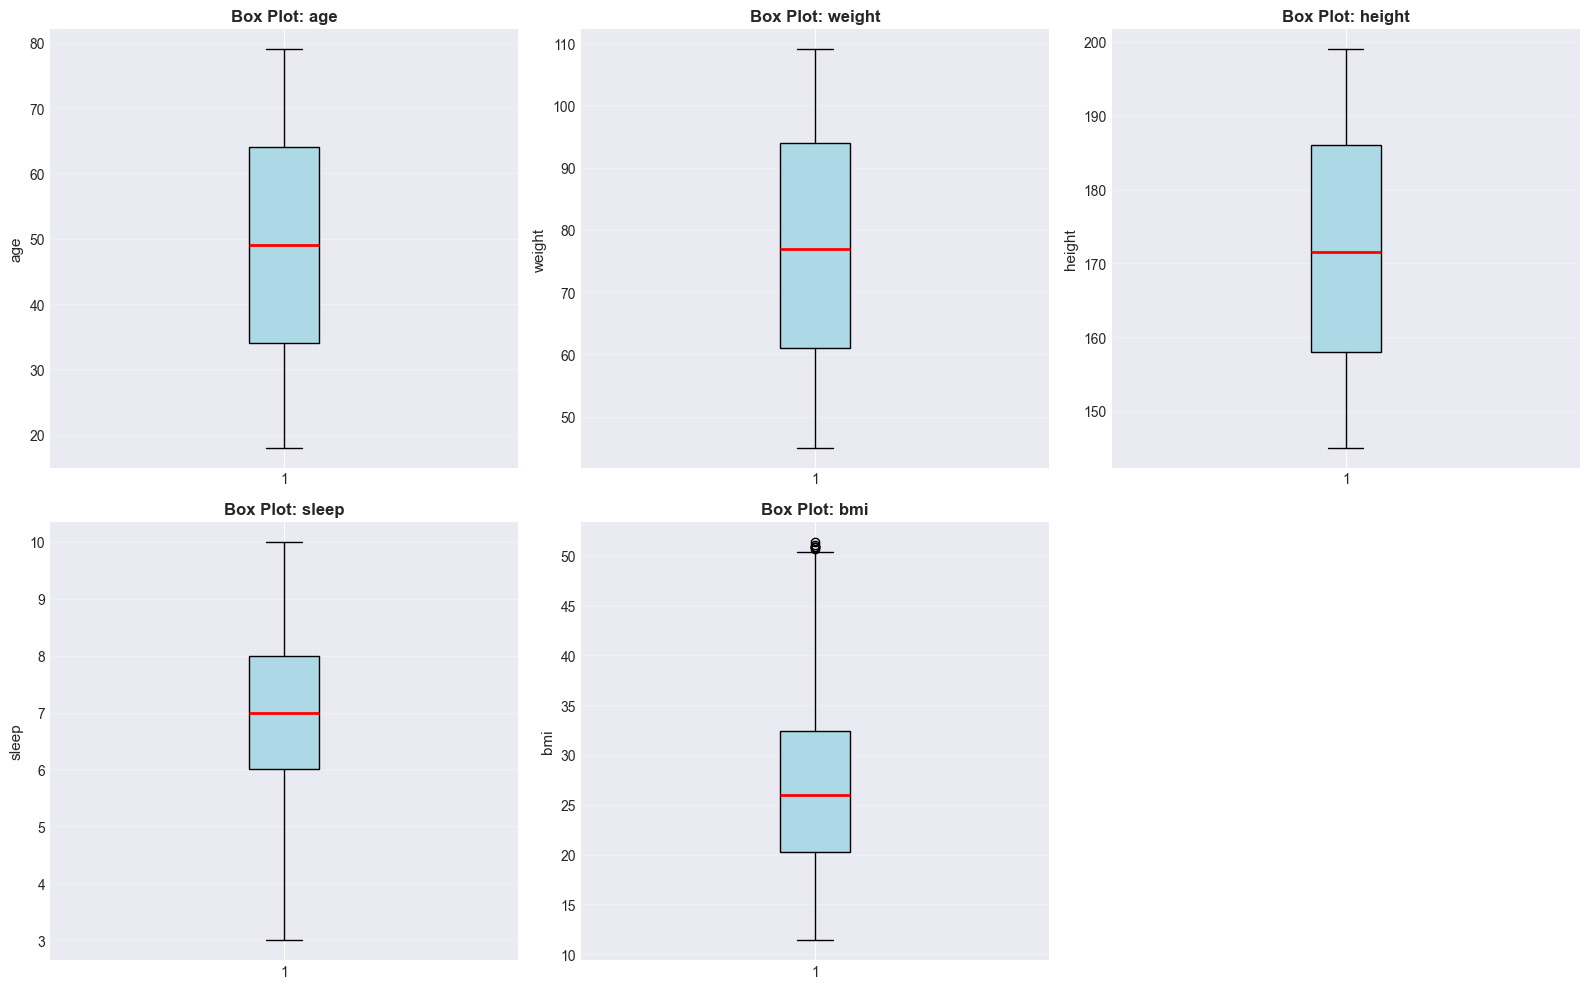


✅ Saved visualization: kaggle_boxplots.png


In [9]:
# Cell 9: Box Plots for Numerical Features
print("="*70)
print(" " * 20 + "BOX PLOTS - OUTLIER DETECTION")
print("="*70)

if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(df_kaggle[col].dropna(), vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightblue', color='black'),
                          medianprops=dict(color='red', linewidth=2),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'))
        axes[idx].set_ylabel(col, fontsize=11)
        axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
        axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Hide unused subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.savefig('../reports/kaggle_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Saved visualization: kaggle_boxplots.png")

                         CATEGORICAL FEATURES ANALYSIS

Categorical Features (6):
  - exercise
  - sugar_intake
  - smoking
  - alcohol
  - married
  - profession

----------------------------------------------------------------------
Feature: EXERCISE
----------------------------------------------------------------------
 Value  Count  Percentage
medium   1985       39.70
   low   1272       25.44
  high   1000       20.00
  none    743       14.86


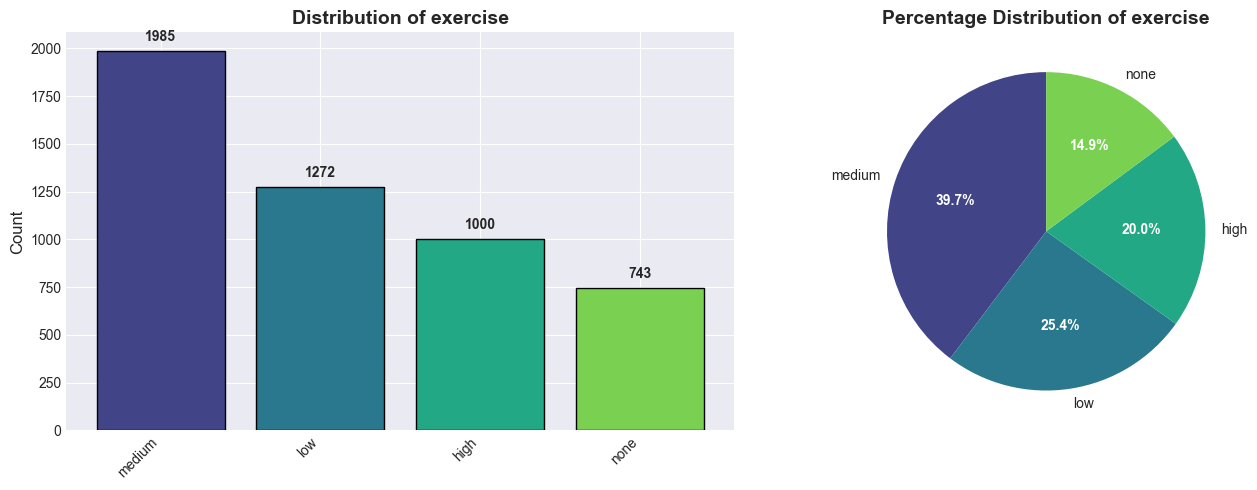


✅ Saved visualization: kaggle_categorical_exercise.png

----------------------------------------------------------------------
Feature: SUGAR_INTAKE
----------------------------------------------------------------------
 Value  Count  Percentage
medium   2511       50.22
   low   1484       29.68
  high   1005       20.10


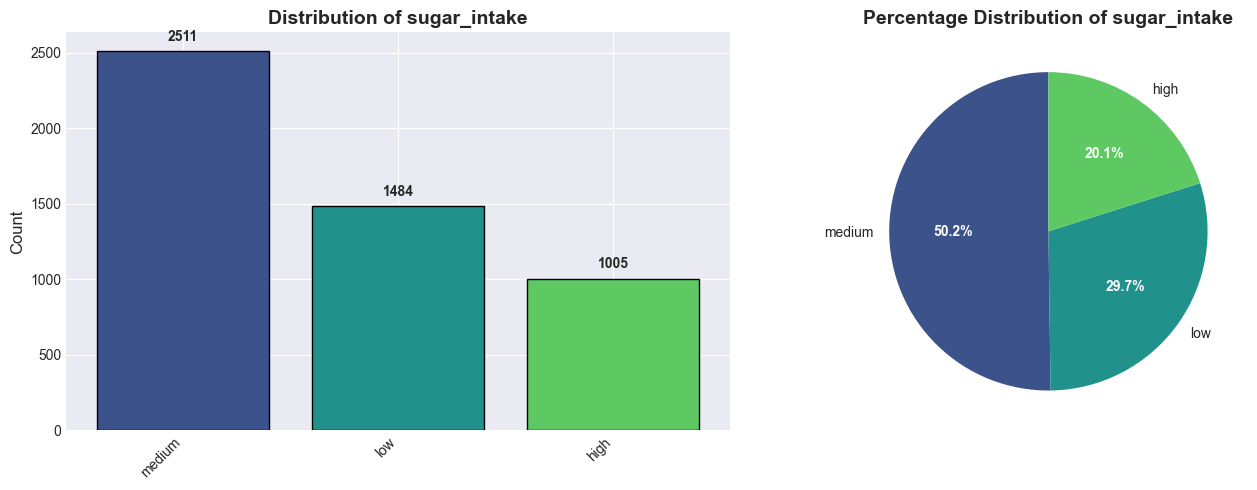


✅ Saved visualization: kaggle_categorical_sugar_intake.png

----------------------------------------------------------------------
Feature: SMOKING
----------------------------------------------------------------------
Value  Count  Percentage
   no   4023       80.46
  yes    977       19.54


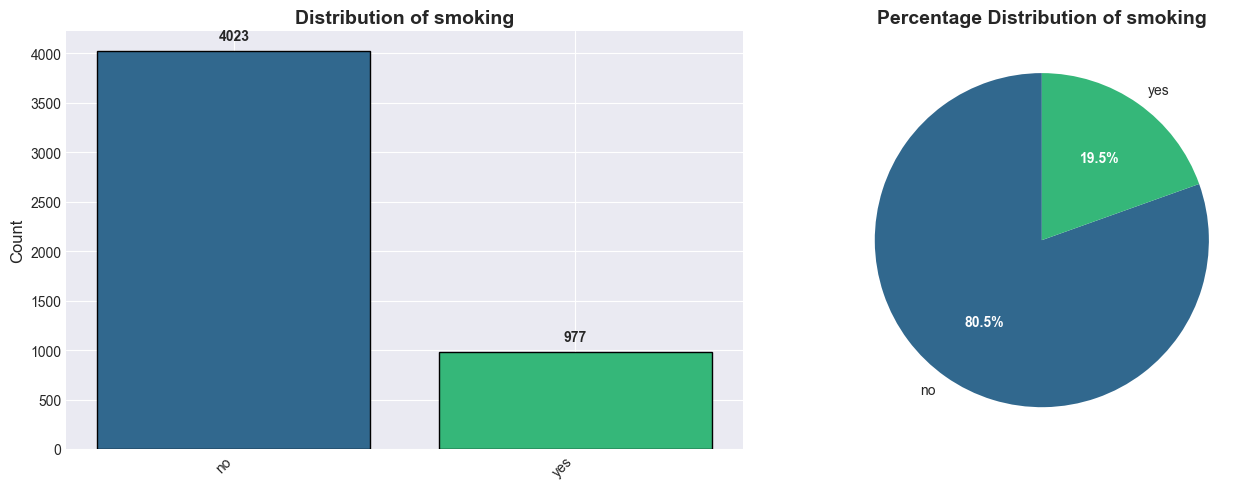


✅ Saved visualization: kaggle_categorical_smoking.png

----------------------------------------------------------------------
Feature: ALCOHOL
----------------------------------------------------------------------
Value  Count  Percentage
   no   3741       74.82
  yes   1259       25.18


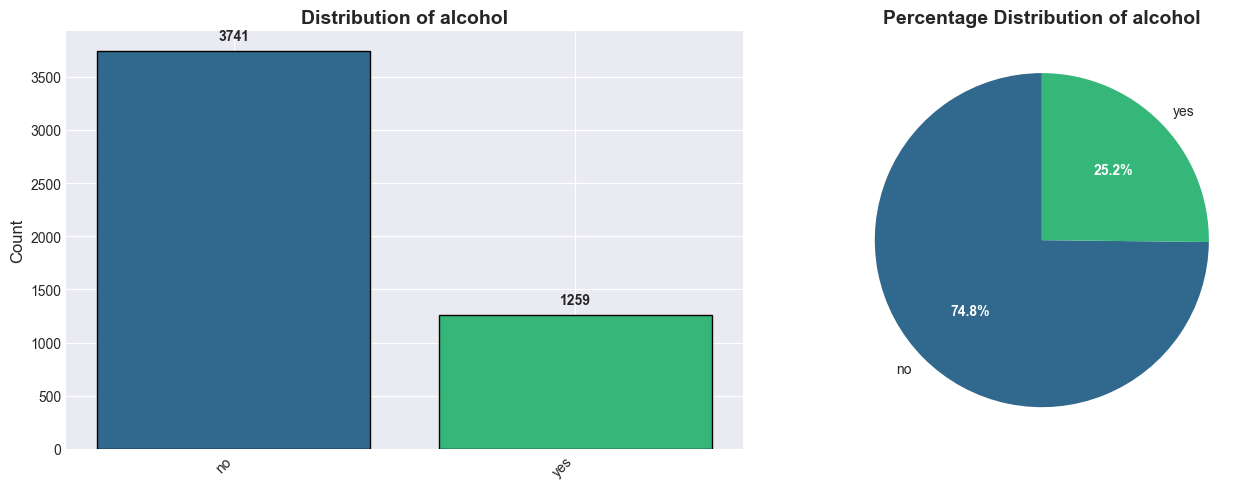


✅ Saved visualization: kaggle_categorical_alcohol.png

----------------------------------------------------------------------
Feature: MARRIED
----------------------------------------------------------------------
Value  Count  Percentage
  yes   3018       60.36
   no   1982       39.64


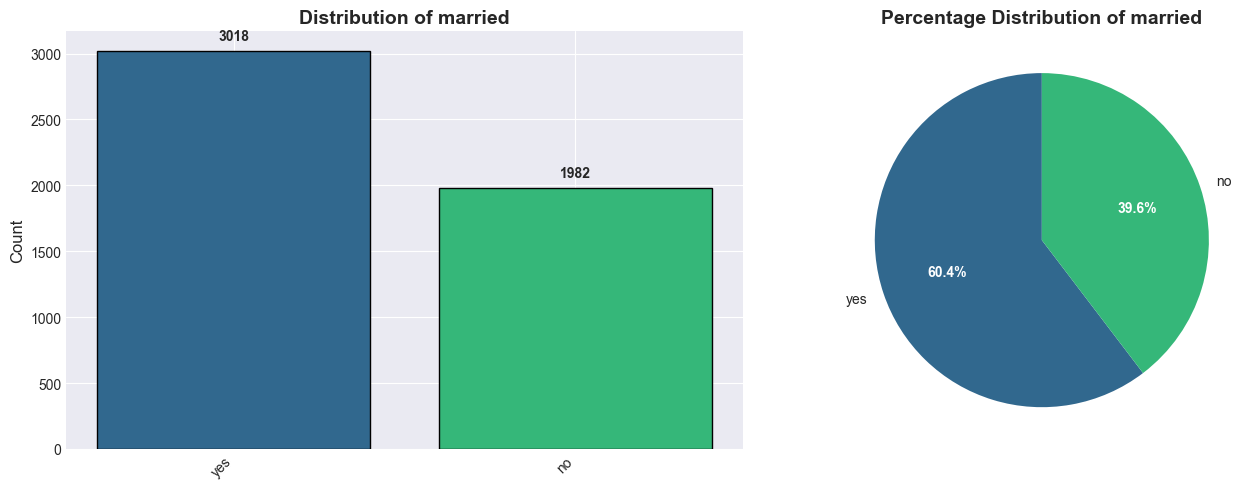


✅ Saved visualization: kaggle_categorical_married.png

----------------------------------------------------------------------
Feature: PROFESSION
----------------------------------------------------------------------
        Value  Count  Percentage
      student    644       12.88
       farmer    639       12.78
       driver    631       12.62
       doctor    630       12.60
       artist    626       12.52
     engineer    616       12.32
      teacher    612       12.24
office_worker    602       12.04


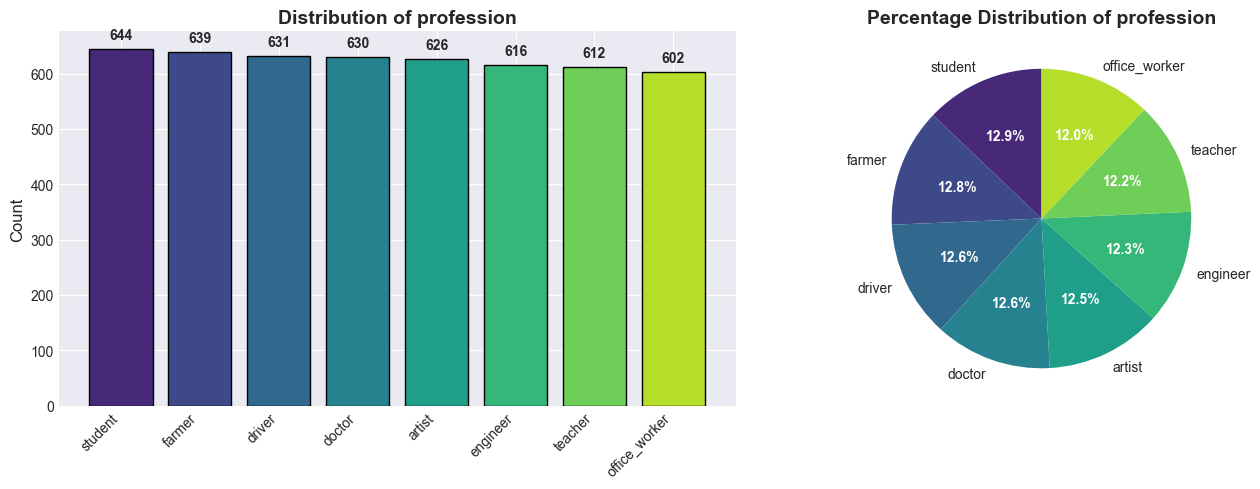


✅ Saved visualization: kaggle_categorical_profession.png


In [10]:
# Cell 10: Categorical Features Analysis
print("="*70)
print(" " * 25 + "CATEGORICAL FEATURES ANALYSIS")
print("="*70)

categorical_cols = df_kaggle.select_dtypes(include=['object']).columns.tolist()

# Remove target if it's categorical
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print(f"\nCategorical Features ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

# Value counts and visualizations
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n{'-'*70}")
        print(f"Feature: {col.upper()}")
        print(f"{'-'*70}")
        
        value_counts = df_kaggle[col].value_counts()
        value_percentage = (value_counts / len(df_kaggle)) * 100
        
        result_df = pd.DataFrame({
            'Value': value_counts.index,
            'Count': value_counts.values,
            'Percentage': value_percentage.values
        })
        
        print(result_df.to_string(index=False))
        
        # Visualization
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Bar chart
        axes[0].bar(range(len(value_counts)), value_counts.values, 
                    color=sns.color_palette("viridis", len(value_counts)), edgecolor='black')
        axes[0].set_xticks(range(len(value_counts)))
        axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[0].set_ylabel('Count', fontsize=12)
        axes[0].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        for i, v in enumerate(value_counts.values):
            axes[0].text(i, v + max(value_counts.values)*0.02, str(v), 
                        ha='center', va='bottom', fontweight='bold')
        
        # Pie chart
        colors = sns.color_palette("viridis", len(value_counts))
        wedges, texts, autotexts = axes[1].pie(value_counts.values, labels=value_counts.index,
                                                 autopct='%1.1f%%', startangle=90, colors=colors)
        axes[1].set_title(f'Percentage Distribution of {col}', fontsize=14, fontweight='bold')
        
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        plt.tight_layout()
        plt.savefig(f'../reports/kaggle_categorical_{col}.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n✅ Saved visualization: kaggle_categorical_{col}.png")
else:
    print("\nNo categorical features to analyze.")

                         CORRELATION ANALYSIS

Correlation Matrix:
             age    weight    height     sleep       bmi
age     1.000000  0.010220  0.020501 -0.022504 -0.011407
weight  0.010220  1.000000  0.001637 -0.012756  0.784869
height  0.020501  0.001637  1.000000 -0.016776 -0.596046
sleep  -0.022504 -0.012756 -0.016776  1.000000 -0.001544
bmi    -0.011407  0.784869 -0.596046 -0.001544  1.000000


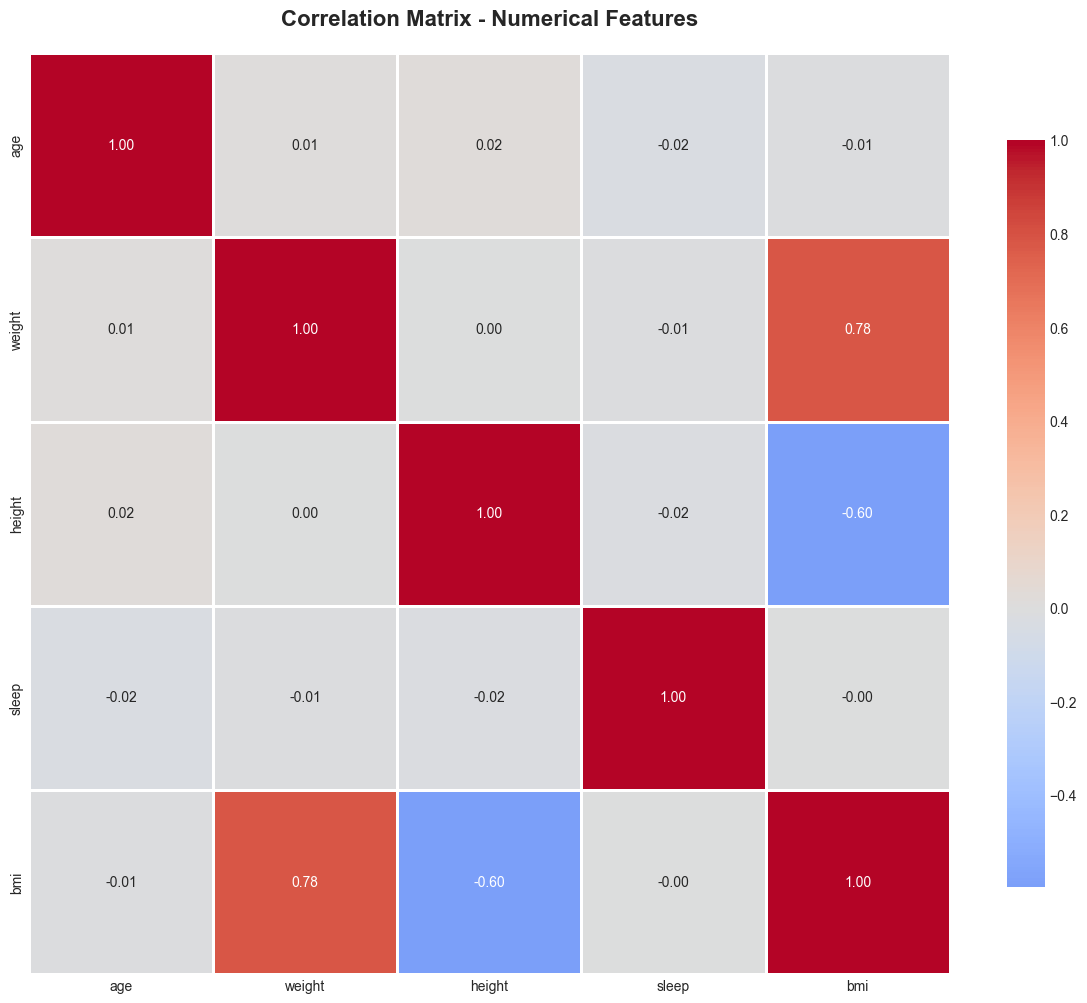


✅ Saved visualization: kaggle_correlation_matrix.png

Highly Correlated Feature Pairs (|correlation| > 0.7):
Feature_1 Feature_2  Correlation
   weight       bmi     0.784869

⚠️  High correlation detected - consider feature selection/engineering


In [11]:
# Cell 11: Correlation Matrix
print("="*70)
print(" " * 25 + "CORRELATION ANALYSIS")
print("="*70)

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df_kaggle[numerical_cols].corr()
    
    print("\nCorrelation Matrix:")
    print(correlation_matrix)
    
    # Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('../reports/kaggle_correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Saved visualization: kaggle_correlation_matrix.png")
    
    # Find highly correlated pairs
    print("\n" + "="*70)
    print("Highly Correlated Feature Pairs (|correlation| > 0.7):")
    print("="*70)
    
    high_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature_1': correlation_matrix.columns[i],
                    'Feature_2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })
    
    if len(high_corr) > 0:
        high_corr_df = pd.DataFrame(high_corr).sort_values('Correlation', 
                                                            key=abs, ascending=False)
        print(high_corr_df.to_string(index=False))
        print("\n⚠️  High correlation detected - consider feature selection/engineering")
    else:
        print("✅ No highly correlated features found")
else:
    print("\nInsufficient numerical features for correlation analysis.")

                    FEATURES vs TARGET ANALYSIS

NUMERICAL FEATURES vs RISK LEVEL


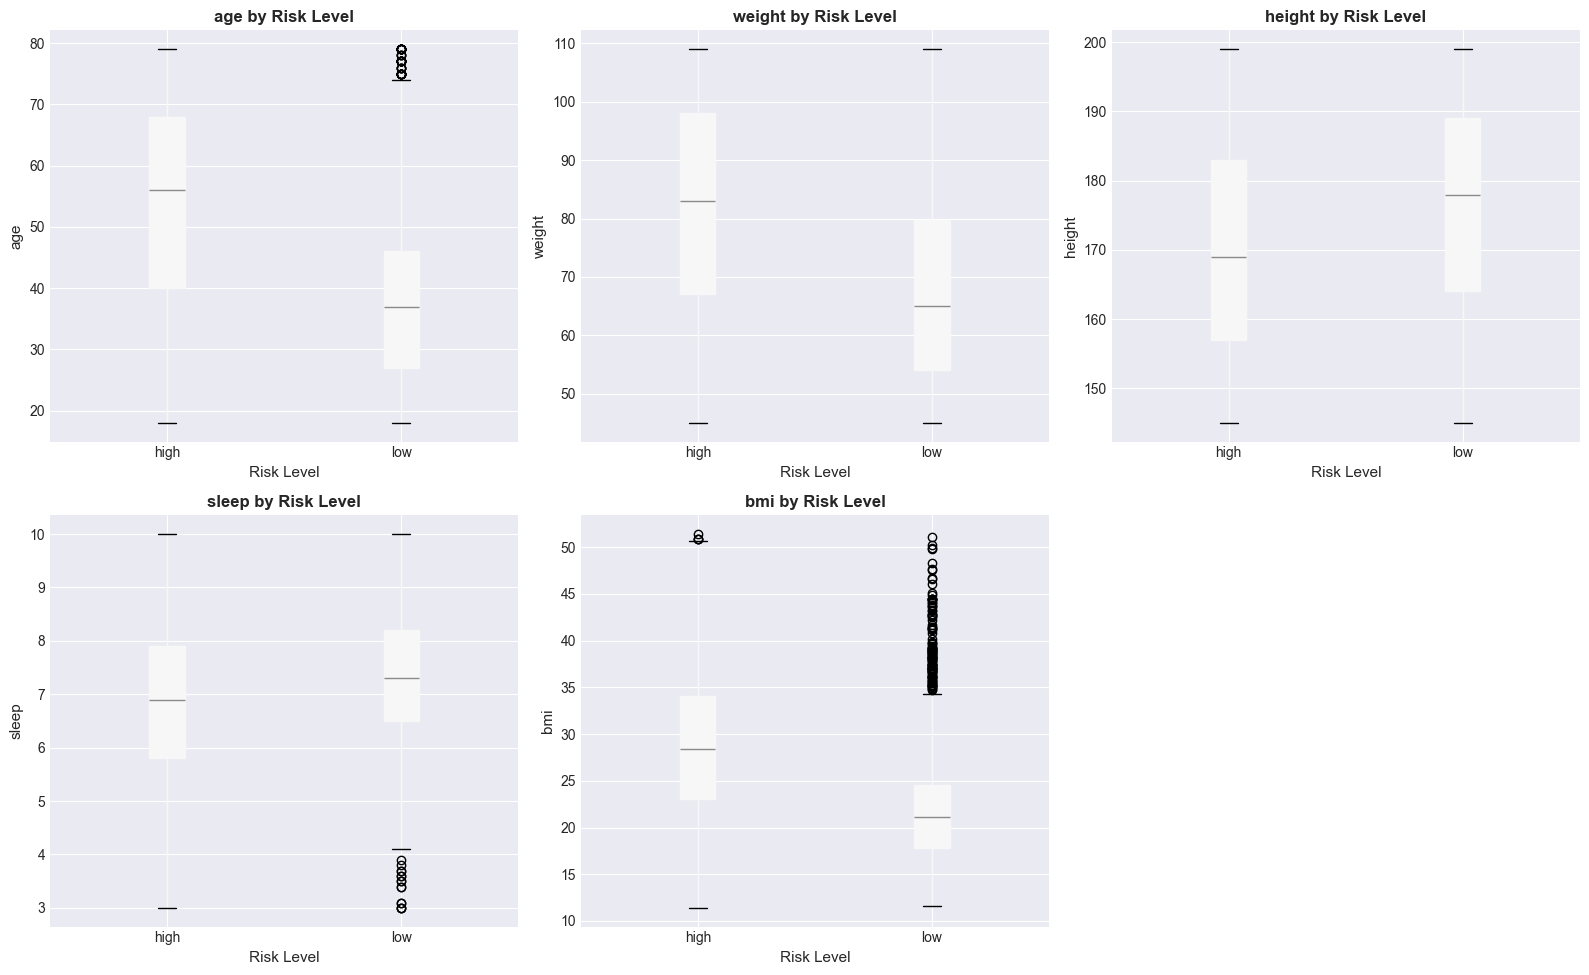


✅ Saved visualization: kaggle_features_vs_target.png

CATEGORICAL FEATURES vs RISK LEVEL

EXERCISE vs RISK LEVEL:
health_risk  high   low   All
exercise                     
high          609   391  1000
low          1065   207  1272
medium       1202   783  1985
none          614   129   743
All          3490  1510  5000


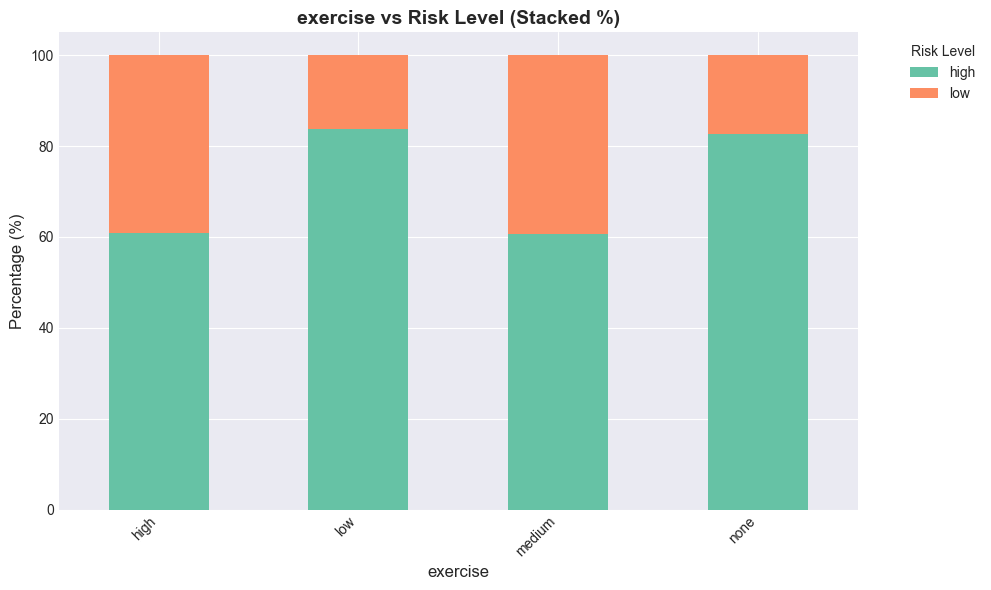


✅ Saved visualization: kaggle_exercise_vs_target.png

SUGAR_INTAKE vs RISK LEVEL:
health_risk   high   low   All
sugar_intake                  
high           845   160  1005
low            989   495  1484
medium        1656   855  2511
All           3490  1510  5000


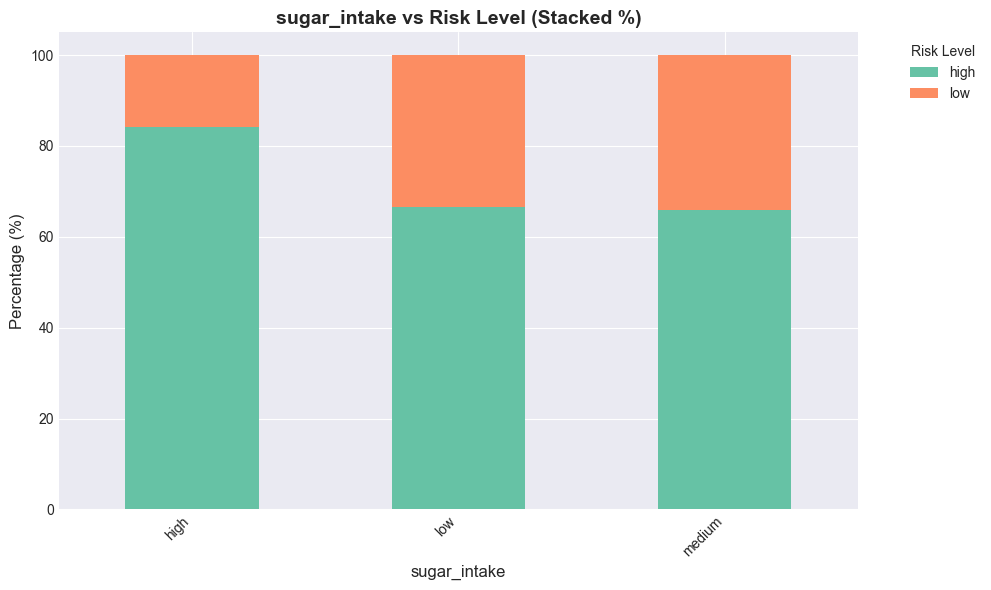


✅ Saved visualization: kaggle_sugar_intake_vs_target.png

SMOKING vs RISK LEVEL:
health_risk  high   low   All
smoking                      
no           2578  1445  4023
yes           912    65   977
All          3490  1510  5000


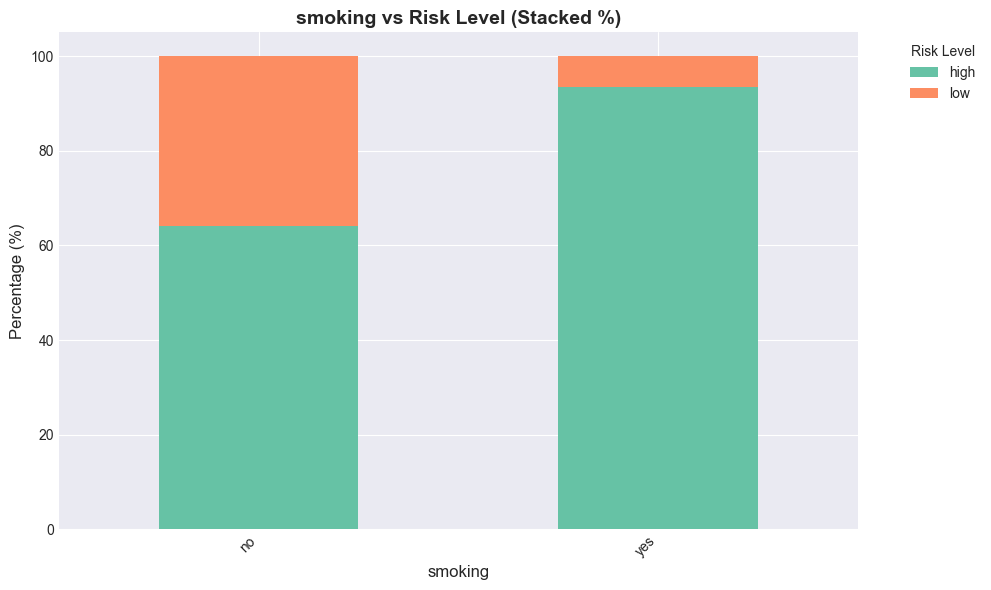


✅ Saved visualization: kaggle_smoking_vs_target.png

ALCOHOL vs RISK LEVEL:
health_risk  high   low   All
alcohol                      
no           2431  1310  3741
yes          1059   200  1259
All          3490  1510  5000


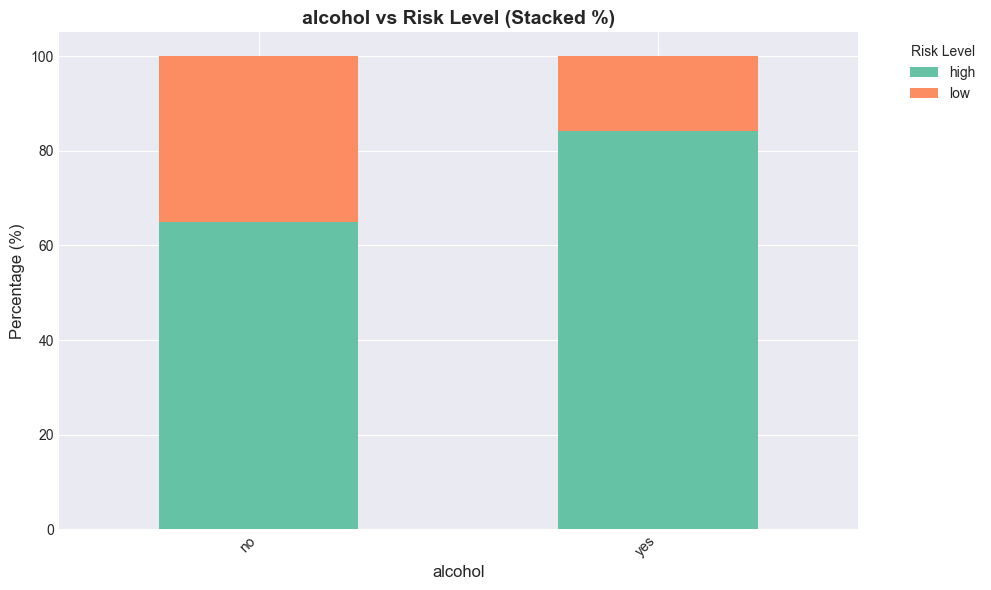


✅ Saved visualization: kaggle_alcohol_vs_target.png

MARRIED vs RISK LEVEL:
health_risk  high   low   All
married                      
no           1405   577  1982
yes          2085   933  3018
All          3490  1510  5000


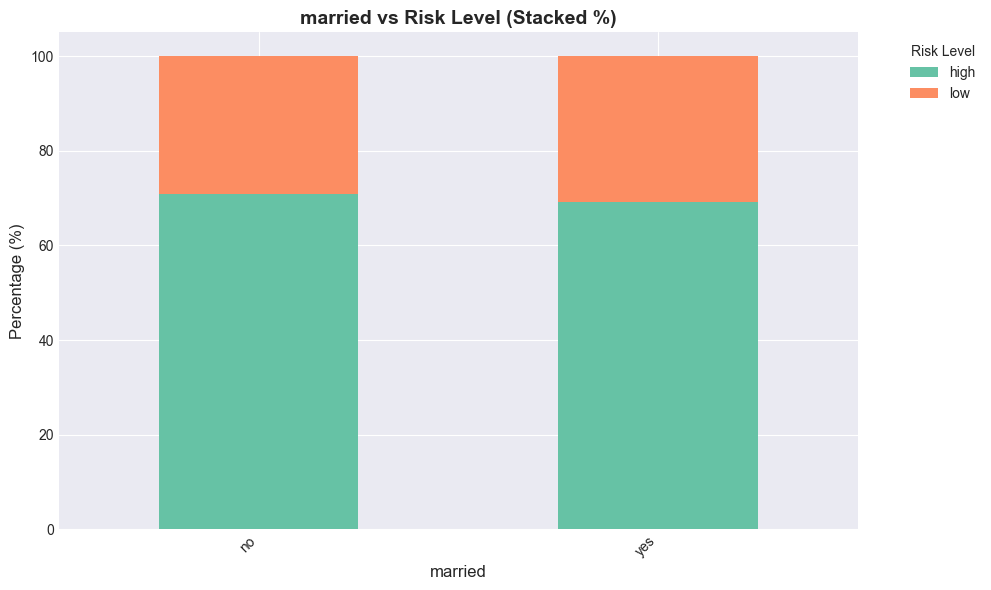


✅ Saved visualization: kaggle_married_vs_target.png

PROFESSION vs RISK LEVEL:
health_risk    high   low   All
profession                     
artist          430   196   626
doctor          419   211   630
driver          457   174   631
engineer        437   179   616
farmer          442   197   639
office_worker   421   181   602
student         451   193   644
teacher         433   179   612
All            3490  1510  5000


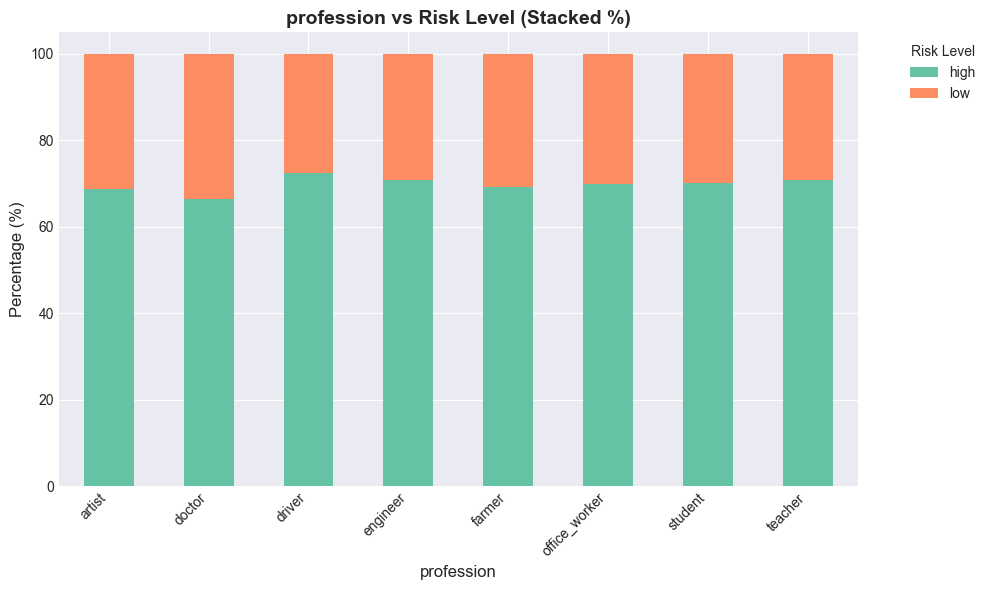


✅ Saved visualization: kaggle_profession_vs_target.png


In [12]:
# Cell 12: Features vs Target Analysis
print("="*70)
print(" " * 20 + "FEATURES vs TARGET ANALYSIS")
print("="*70)

if target_col in df_kaggle.columns:
    
    # Numerical features vs Target
    if len(numerical_cols) > 0:
        print("\n" + "="*70)
        print("NUMERICAL FEATURES vs RISK LEVEL")
        print("="*70)
        
        n_cols = 3
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
        
        for idx, col in enumerate(numerical_cols):
            df_kaggle.boxplot(column=col, by=target_col, ax=axes[idx], patch_artist=True)
            axes[idx].set_xlabel('Risk Level', fontsize=11)
            axes[idx].set_ylabel(col, fontsize=11)
            axes[idx].set_title(f'{col} by Risk Level', fontsize=12, fontweight='bold')
            axes[idx].get_figure().suptitle('')
        
        # Hide unused subplots
        for idx in range(len(numerical_cols), len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.savefig('../reports/kaggle_features_vs_target.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n✅ Saved visualization: kaggle_features_vs_target.png")
    
    # Categorical features vs Target
    if len(categorical_cols) > 0:
        print("\n" + "="*70)
        print("CATEGORICAL FEATURES vs RISK LEVEL")
        print("="*70)
        
        for col in categorical_cols:
            print(f"\n{col.upper()} vs RISK LEVEL:")
            crosstab = pd.crosstab(df_kaggle[col], df_kaggle[target_col], margins=True)
            print(crosstab)
            
            # Stacked bar chart
            crosstab_no_margins = pd.crosstab(df_kaggle[col], df_kaggle[target_col], normalize='index') * 100
            
            fig, ax = plt.subplots(figsize=(10, 6))
            crosstab_no_margins.plot(kind='bar', stacked=True, ax=ax, 
                                     color=sns.color_palette("Set2", len(df_kaggle[target_col].unique())))
            ax.set_xlabel(col, fontsize=12)
            ax.set_ylabel('Percentage (%)', fontsize=12)
            ax.set_title(f'{col} vs Risk Level (Stacked %)', fontsize=14, fontweight='bold')
            ax.legend(title='Risk Level', bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.savefig(f'../reports/kaggle_{col}_vs_target.png', dpi=300, bbox_inches='tight')
            plt.show()
            
            print(f"\n✅ Saved visualization: kaggle_{col}_vs_target.png")

In [13]:
# Cell 13: Data Quality Summary
print("="*70)
print(" " * 25 + "DATA QUALITY SUMMARY")
print("="*70)

print("\n📊 DUPLICATES:")
print("-" * 70)
duplicates = df_kaggle.duplicated().sum()
print(f"  Total duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"  Percentage: {duplicates/len(df_kaggle)*100:.2f}%")
    print("  ⚠️  Consider removing duplicates before modeling")
else:
    print("  ✅ No duplicates found")

print("\n📊 UNIQUE VALUES PER COLUMN:")
print("-" * 70)
for col in df_kaggle.columns:
    unique_count = df_kaggle[col].nunique()
    unique_pct = (unique_count / len(df_kaggle)) * 100
    print(f"  {col:25s}: {unique_count:6,} unique values ({unique_pct:6.2f}%)")

print("\n📊 DATA TYPES SUMMARY:")
print("-" * 70)
dtype_summary = df_kaggle.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"  {str(dtype):15s}: {count} columns")

                         DATA QUALITY SUMMARY

📊 DUPLICATES:
----------------------------------------------------------------------
  Total duplicate rows: 0
  ✅ No duplicates found

📊 UNIQUE VALUES PER COLUMN:
----------------------------------------------------------------------
  age                      :     62 unique values (  1.24%)
  weight                   :     65 unique values (  1.30%)
  height                   :     55 unique values (  1.10%)
  exercise                 :      4 unique values (  0.08%)
  sleep                    :     71 unique values (  1.42%)
  sugar_intake             :      3 unique values (  0.06%)
  smoking                  :      2 unique values (  0.04%)
  alcohol                  :      2 unique values (  0.04%)
  married                  :      2 unique values (  0.04%)
  profession               :      8 unique values (  0.16%)
  bmi                      :    383 unique values (  7.66%)
  health_risk              :      2 unique values (  0.04%

In [14]:
# Cell 14: Feature Engineering Suggestions
print("="*70)
print(" " * 20 + "FEATURE ENGINEERING SUGGESTIONS")
print("="*70)

suggestions = []

# Check for potential BMI calculation
if 'height' in df_kaggle.columns and 'weight' in df_kaggle.columns and 'bmi' not in df_kaggle.columns:
    suggestions.append("✨ Create BMI: weight / (height/100)^2")

# Check for age groups
if 'age' in df_kaggle.columns:
    suggestions.append("✨ Create age groups: Young (<30), Adult (30-50), Senior (>50)")

# Check for binary features
for col in categorical_cols:
    if df_kaggle[col].nunique() == 2:
        suggestions.append(f"✨ Convert '{col}' to binary (0/1)")

# Check for exercise/activity combinations
if 'exercise' in df_kaggle.columns and 'sleep' in df_kaggle.columns:
    suggestions.append("✨ Create lifestyle score: combine exercise + sleep quality")

# Check for substance use flags
substance_cols = [col for col in df_kaggle.columns if any(x in col.lower() for x in ['smoking', 'alcohol', 'drug'])]
if len(substance_cols) > 1:
    suggestions.append(f"✨ Create substance_use_flag: combine {', '.join(substance_cols)}")

if len(suggestions) > 0:
    print("\n💡 Recommended Feature Engineering:")
    for idx, suggestion in enumerate(suggestions, 1):
        print(f"  {idx}. {suggestion}")
else:
    print("\n✅ Dataset appears well-featured. No immediate engineering needed.")

                    FEATURE ENGINEERING SUGGESTIONS

💡 Recommended Feature Engineering:
  1. ✨ Create age groups: Young (<30), Adult (30-50), Senior (>50)
  2. ✨ Convert 'smoking' to binary (0/1)
  3. ✨ Convert 'alcohol' to binary (0/1)
  4. ✨ Convert 'married' to binary (0/1)
  5. ✨ Create lifestyle score: combine exercise + sleep quality
  6. ✨ Create substance_use_flag: combine smoking, alcohol


In [15]:
# Cell 15: Final EDA Summary Report
print("="*80)
print(" " * 25 + "KAGGLE DATASET - EDA SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print("-" * 80)
print(f"  Total Records: {len(df_kaggle):,}")
print(f"  Total Features: {len(df_kaggle.columns)}")
print(f"  Numerical Features: {len(numerical_cols)}")
print(f"  Categorical Features: {len(categorical_cols)}")
print(f"  Memory Usage: {df_kaggle.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 DATA QUALITY:")
print("-" * 80)
missing_total = df_kaggle.isnull().sum().sum()
print(f"  Missing Values: {missing_total} ({missing_total/(len(df_kaggle)*len(df_kaggle.columns))*100:.2f}%)")
print(f"  Duplicate Rows: {df_kaggle.duplicated().sum()}")

if target_col in df_kaggle.columns:
    print(f"\n📊 TARGET VARIABLE ({target_col}):")
    print("-" * 80)
    print(f"  Unique Values: {df_kaggle[target_col].nunique()}")
    for value, count in df_kaggle[target_col].value_counts().items():
        pct = count / len(df_kaggle) * 100
        print(f"    {value:15s}: {count:6,} ({pct:5.1f}%)")

print("\n📁 VISUALIZATIONS GENERATED:")
print("-" * 80)
visualizations = [
    "kaggle_risk_distribution.png",
    "kaggle_numerical_distributions.png",
    "kaggle_boxplots.png",
    "kaggle_correlation_matrix.png",
    "kaggle_features_vs_target.png"
]
for viz in visualizations:
    print(f"  ✅ {viz}")

print("\n🎯 NEXT STEPS:")
print("-" * 80)
print("  1. Handle missing values (if any)")
print("  2. Remove duplicates (if any)")
print("  3. Engineer new features (see suggestions)")
print("  4. Encode categorical variables")
print("  5. Split data (train/test)")
print("  6. Scale numerical features")
print("  7. Train baseline models")

print("\n" + "="*80)
print(" " * 25 + "KAGGLE EDA COMPLETED SUCCESSFULLY! ✅")
print("="*80)

                         KAGGLE DATASET - EDA SUMMARY

📊 DATASET OVERVIEW:
--------------------------------------------------------------------------------
  Total Records: 5,000
  Total Features: 12
  Numerical Features: 5
  Categorical Features: 6
  Memory Usage: 2.22 MB

📊 DATA QUALITY:
--------------------------------------------------------------------------------
  Missing Values: 0 (0.00%)
  Duplicate Rows: 0

📊 TARGET VARIABLE (health_risk):
--------------------------------------------------------------------------------
  Unique Values: 2
    high           :  3,490 ( 69.8%)
    low            :  1,510 ( 30.2%)

📁 VISUALIZATIONS GENERATED:
--------------------------------------------------------------------------------
  ✅ kaggle_risk_distribution.png
  ✅ kaggle_numerical_distributions.png
  ✅ kaggle_boxplots.png
  ✅ kaggle_correlation_matrix.png
  ✅ kaggle_features_vs_target.png

🎯 NEXT STEPS:
--------------------------------------------------------------------------------
  